# SkLearn

Inicially we saw traditional methods (Linear Regression, log regression and clustering) using the statsmodels.api (which is more focused on statistical methods), however, the Sklearn library is widely more used by professionals for machine learning traditional methods.

(for deep learning and more advanced methods, Keras, TensorFlow and Pytorch and much more suitable)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [3]:
#importing

data = pd.read_csv('db/real_estate_price_size.csv')

data

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


## Creating the regression

In [4]:
y = data['price'] #dependent variable / output / target

x1 = data['size'] #independent variable / input / feature

#Checking the shapes

The data needs to be reshaped into a matrix before implemtenting regression on Sklearn

In [5]:
y.shape

(100,)

In [6]:
x1.shape

(100,)

In [7]:
x = x1.values.reshape(-1,1) #specifying "-1" will get the last value even if you don't know the data size

x.shape

(100, 1)

In [8]:
reg = LinearRegression()

reg.fit(x,y)

LinearRegression()

    #There are methods to obtain all values needed

R-Squared

In [9]:
reg.score(x,y)

0.7447391865847587

Coefficients

In [10]:
reg.coef_

array([223.17874259])

Intercept

In [11]:
reg.intercept_

101912.60180122912

### Graph

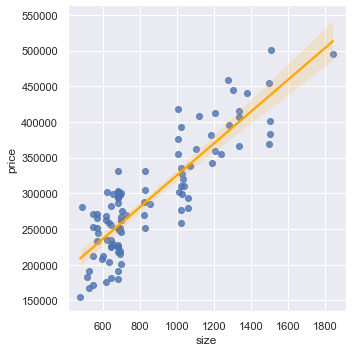

In [12]:
graph = sns.lmplot(data=data, x='size', y='price',
                   line_kws={"color": "orange"})

### Making Predictions

In [13]:
new_data = pd.DataFrame(data=[800,1600],columns=['size'])
new_data

,size
0,800
1,1600


In [14]:
reg.predict(new_data)

C:\Users\Pichau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([280455.59587692, 458998.5899526 ])

# Multiple Linear Regression

In [15]:
data1 = pd.read_csv('db/real_estate_price_size_year_view.csv')
data1

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [64]:
data1['view'] = data1['view'].map({'No sea view':0, 'Sea view':1})

data1

,price,size,year,view
0,234314.144,643.09,2015,NaN
1,228581.528,656.22,2009,NaN
2,281626.336,487.29,2018,NaN
3,401255.608,1504.75,2015,NaN
4,458674.256,1275.46,2009,NaN
...,...,...,...,...
95,252460.400,549.80,2009,NaN
96,310522.592,1037.44,2009,NaN
97,383635.568,1504.75,2006,NaN
98,225145.248,648.29,2015,NaN


## Creating the regression

In [63]:
y = data1['price']

x = data1[['size','view']]

In [27]:
reg1 = LinearRegression()
reg1.fit(x,y)

LinearRegression()

R-Squared

In [46]:
reg1.score(x,y)

0.8853120093583754

Coeficient

In [28]:
reg1.coef_

array([  218.7521031, 57559.8490005])

Intercept

In [88]:
reg1.intercept_

77484.30640646437

### Graph

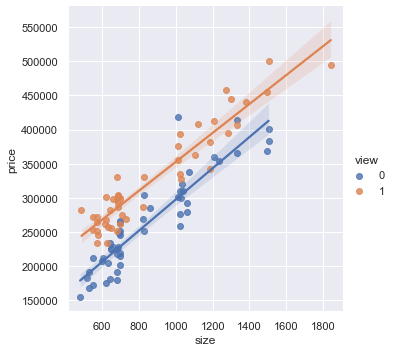

In [36]:
graph1 = sns.lmplot(data=data1, x='size', y='price', hue='view')

### Making Predictions

In [43]:
new_data1 = pd.DataFrame(data=[[800,1],[1200,0]],columns=['size','view'])
new_data1

,size,view
0,800,1
1,1200,0


In [44]:
reg1.predict(new_data1)

array([310045.83788518, 339986.83012378])

### Formula for adjusted R-Squared

$R^{2}_{adj} = 1-(1-R^{2})*\frac{n-1}{n-p-1}$

In [47]:
x.shape

(100, 2)

In [49]:
r2 = reg1.score(x,y)

n = x.shape[0]

p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

#slightly smaller than R2

# comparing with the StatsModel Summary we can se the values obtained here match

0.8829473085204038

### F-Regression 

Creates simple Linear Regressions of each feature and the dependent variable

In [52]:
from sklearn.feature_selection import f_regression

In [53]:
f_regression(x,y)

(array([285.92105192,  20.25908753]), array([8.12763222e-31, 1.86445030e-05]))

In [60]:
p_values = f_regression(x,y)[1]

p_values

array([8.12763222e-31, 1.86445030e-05])

In [61]:
p_values.round(3)

#as both approach zero, we know both are valuable variables for this analisys

array([0., 0.])

### Summary Data with P-values

In [67]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])

reg_summary

,Features
0,size
1,view


In [73]:
reg_summary['Coefficients'] = reg1.coef_
reg_summary['p-values'] = p_values.round(5)

reg_summary

,Features,Coefficients,p-values
0,size,218.752103,0.00000
1,view,57559.849001,0.00002


## Feature Scaling / Normalization / Standartization

Subtracting the mean and dividing by the standard deviation

$= \frac{x-\mu}{\sigma}$

Having all inputs with the same magnitude hepls for a beter comparison and makes all of them have the same relative impact on the result

When working with scaled features, you don't need to worry with finding the p-values before performing the algorithms, since the normalized data will already penalize irrelevant data by making it approach zero

In [74]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler() #contains all standardization info

scaler.fit(x)

StandardScaler()

In [95]:
x_scaled = scaler.transform(x)
x_scaled

array([[-0.70816415, -0.98019606],
       [-0.66387316, -0.98019606],
       [-1.23371919,  1.02020406],
       [ 2.19844528, -0.98019606],
       [ 1.42498884,  1.02020406],
       [-0.937209  ,  1.02020406],
       [-0.95171405,  1.02020406],
       [-0.78328682, -0.98019606],
       [-0.57603328,  1.02020406],
       [-0.53467702, -0.98019606],
       [ 0.69939906, -0.98019606],
       [ 3.33780001,  1.02020406],
       [-0.53467702, -0.98019606],
       [ 0.52699137, -0.98019606],
       [ 1.51100715,  1.02020406],
       [ 1.77668568,  1.02020406],
       [-0.54810263, -0.98019606],
       [-0.77276222,  1.02020406],
       [-0.58004747, -0.98019606],
       [ 0.58943055, -0.98019606],
       [-0.78365788,  1.02020406],
       [-1.02322731, -0.98019606],
       [ 1.19557293,  1.02020406],
       [-1.12884431, -0.98019606],
       [-1.10378093, -0.98019606],
       [ 0.84424715,  1.02020406],
       [-0.95171405,  1.02020406],
       [ 1.62279723,  1.02020406],
       [-0.58004747,

### Regression with scaled features

In [96]:
reg2 = LinearRegression()
reg2.fit(x_scaled,y)

LinearRegression()

In [97]:
reg2.coef_

array([64848.73237624, 28774.16793964])

In [98]:
reg2.intercept_

292289.4701599999

### Summary table

In [99]:
reg2_summary = pd.DataFrame([['Intercept'],['size'],['view']], columns=['Features'])
reg2_summary['Weights'] = reg2.intercept_, reg2.coef_[0], reg2.coef_[1]
reg2_summary

,Features,Weights
0,Intercept,292289.470160
1,size,64848.732376
2,view,28774.167940


### Predictions with standardized data

In [103]:
new_data2 = pd.DataFrame(data=[[800,1],[1200,0]],columns=['size','view']) #same values as used in the previous prediction
new_data2

,size,view
0,800,1
1,1200,0


In [106]:
# the inputs need to be scaled as the rest od the data set

scaled_data = scaler.transform(new_data2)
scaled_data

array([[-0.1788648 ,  1.02020406],
       [ 1.17044209, -0.98019606]])

In [107]:
reg2.predict(scaled_data) #then the results found will be the same

array([310045.83788518, 339986.83012378])

## Train-test Split

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
a = np.arange(1,101) #generate arranged values on an array
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [162]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [163]:
train_test_split(a) #splits the data, where the first generated array is the train data and the second is the test data

[array([69, 92, 17, 49, 11, 54, 18, 45, 14, 37, 85, 50, 90, 93, 63, 68, 89,
         2, 59, 84, 22, 96, 94, 70, 20, 62, 34,  6,  4, 81, 16, 73, 75, 82,
        64, 79, 40, 56, 33, 19, 95,  7, 39, 29, 78, 43, 30, 12, 25, 65, 77,
        41, 97, 87, 55, 31, 83, 42, 99, 24, 28, 26,  1, 23, 98, 38, 15, 72,
        57, 48, 66, 76, 27, 35,  3]),
 array([ 74,  13, 100,   9,  67,  86,  61,  51,   5,  21,  52,  44,  53,
         58,  47,  88,  46,  32,  71,  36,   8,  60,  91,  10,  80])]

In [164]:
a_train, a_test, b_train, b_test = train_test_split(a, b, #this method can receive multiple arrays at once
                                    test_size=.2, #test size = .2 means 20% will be used as test and 80% as train data
                                   shuffle=True,# by defalt the data will be shuffled before spliting (which is usually better) so there is no need to set it to True
                                   random_state=42) # the value of the ramdom state does not matter, it will only guarantee that your data is shuffled the same way every time you run the code


In [165]:
a_train.shape

(80,)

In [166]:
a_test.shape

(20,)

In [167]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [168]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [170]:
b_train.shape

(80,)

In [169]:
b_test.shape

(20,)